In [161]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn

from pyneuromodulation import nm_IO
from examples import example_BIDS

First let's read raw ECoG and STN-LFP data in BIDS format.

In [5]:
PATH_RUN = os.path.join(
        os.path.abspath('examples\\data'), 'sub-testsub', 'ses-EphysMedOff', 'ieeg',
        "sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr")

raw_arr, raw_arr_data, fs, line_noise = nm_IO.read_BIDS_data(
            PATH_RUN, os.path.abspath('examples\\data'))

Extracting parameters from C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_ieeg.vhdr...
Setting channel info structure...
Reading channel info from C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_task-buttonpress_run-0_channels.tsv.
Reading in coordinate system frame Other: None.
Reading electrode coords from C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\ses-EphysMedOff\ieeg\sub-testsub_ses-EphysMedOff_acq-StimOff_space-mni_electrodes.tsv.
The read in electrodes file is: 
 [('name', ['ECOG_AT_SM_L_1', 'ECOG_AT_SM_L_2', 'ECOG_AT_SM_L_3', 'ECOG_AT_SM_L_4', 'ECOG_AT_SM_L_5', 'ECOG_AT_SM_L_6', 'LFP_STN_R_234', 'LFP_STN_R_567', 'LFP_BS_STN_L_1', 'LFP_STN_L_234', 'LFP_STN_L_567', 'LFP_3_R_STN_PI', 'LFP_4_R_STN_PI', 'ANALOG_ROT_R_1']), ('x', ['-47', '-46', '-45.5', '-44.5', '-42', '-39', '11.8',

C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\path.py:1303: RuntimeWarning: Did not find any events.tsv associated with sub-testsub_ses-EphysMedOff_task-buttonpress_run-0.

The search_str was "C:\Users\ICN_admin\Documents\py_neuromodulation\examples\data\sub-testsub\**\sub-testsub_ses-EphysMedOff*events.tsv"
  warn(msg)
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:467: RuntimeWarning: Defaulting coordinate frame to unknown from coordinate system input Other
  warn(f"Defaulting coordinate frame to unknown "
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:514: RuntimeWarning: There are channels without locations (n/a) that are not marked as bad: ['ANALOG_ROT_R_1']
  warn(f"There are channels without locations "
C:\Users\ICN_admin\Anaconda3\envs\pyneuromodulation\lib\site-packages\mne_bids\dig.py:521: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to 

In [12]:
raw_arr.ch_names

['LFP_STN_R_234',
 'LFP_STN_R_567',
 'LFP_BS_STN_L_1',
 'LFP_STN_L_234',
 'LFP_STN_L_567',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'ANALOG_ROT_R_1']

In [7]:
raw_arr_data.shape

(12, 24751)

In [18]:
X = raw_arr_data[:-1,:]
y = np.array(raw_arr_data[-1]<0)*1

In [22]:
X.shape

(11, 24751)

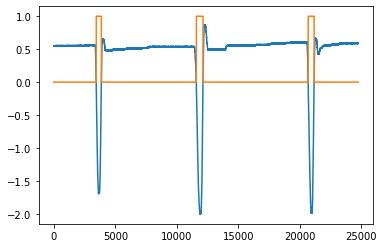

In [21]:
plt.plot(raw_arr_data[-1]/100)
plt.plot(y)

In [71]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X.T, y, test_size=0.3, shuffle=False)

#### Explority Data Analysis

👋 **Task 1**
    
Have a look at the features X_train. We're going to feed our model lateron with those.

Ideas:

 - Plot the features over time.

 - Plot the correlation coefficients within features.

 - Plot the correlations of features with the label.

*Hint: matplotlib.plot / imshow, np.corrcoef are your friends*

For nice plots, recall fs=1375 Hz, channels names can be found in `raw_arr.ch_names`

In [121]:
fs

1375

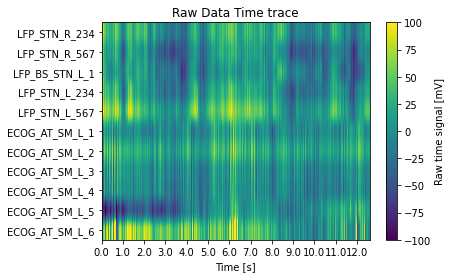

In [134]:
plt.imshow(X_train.T, aspect='auto')
plt.xticks(np.arange(0, X_train.shape[0], 1375), np.round(np.arange(0, X_train.shape[0], 1375)/fs, 2))
plt.yticks(np.arange(0, 11, 1),raw_arr.ch_names[:-1], rotation=0)
plt.xlabel("Time [s]")
plt.clim(-100, 100)
cbar = plt.colorbar()
cbar.set_label("Raw time signal [mV]")
plt.title("Raw Data Time trace")
plt.show()

In [157]:
raw_arr.ch_names

['LFP_STN_R_234',
 'LFP_STN_R_567',
 'LFP_BS_STN_L_1',
 'LFP_STN_L_234',
 'LFP_STN_L_567',
 'ECOG_AT_SM_L_1',
 'ECOG_AT_SM_L_2',
 'ECOG_AT_SM_L_3',
 'ECOG_AT_SM_L_4',
 'ECOG_AT_SM_L_5',
 'ECOG_AT_SM_L_6',
 'ANALOG_ROT_R_1']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'LFP_STN_R_234'),
  Text(2, 0, 'LFP_STN_R_567'),
  Text(3, 0, 'LFP_BS_STN_L_1'),
  Text(4, 0, 'LFP_STN_L_234'),
  Text(5, 0, 'LFP_STN_L_567'),
  Text(6, 0, 'ECOG_AT_SM_L_1'),
  Text(7, 0, 'ECOG_AT_SM_L_2'),
  Text(8, 0, 'ECOG_AT_SM_L_3'),
  Text(9, 0, 'ECOG_AT_SM_L_4'),
  Text(10, 0, 'ECOG_AT_SM_L_5'),
  Text(11, 0, 'ECOG_AT_SM_L_6')])

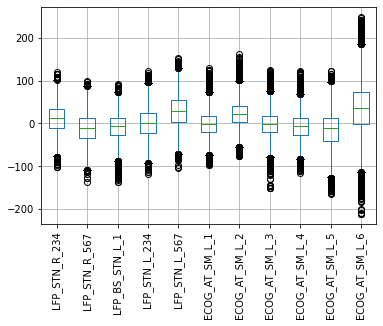

In [202]:
df_X_tr = pd.DataFrame(X_train)
df_X_tr.columns = raw_arr.ch_names[:-1]
#df_X_tr["label"] = y_train
#df_X_tr["time"] = np.arange(0, X_train.shape[0], 1)/fs

df_X_tr.boxplot()
plt.xticks(rotation=90)
p

In [196]:
df_X_tr.set_index("time")

,LFP_STN_R_234,LFP_STN_R_567,LFP_BS_STN_L_1,LFP_STN_L_234,LFP_STN_L_567,ECOG_AT_SM_L_1,ECOG_AT_SM_L_2,ECOG_AT_SM_L_3,ECOG_AT_SM_L_4,ECOG_AT_SM_L_5,ECOG_AT_SM_L_6,label
time,,,,,,,,,,,,
0.000000,15.0,-11.0,-9.0,16.0,49.0,3.0,27.0,5.0,16.0,-108.0,9.0,0
0.000727,23.0,-1.0,-3.0,21.0,56.0,9.0,33.0,12.0,21.0,-102.0,15.0,0
0.001455,42.0,16.0,13.0,40.0,74.0,23.0,49.0,29.0,38.0,-84.0,34.0,0
0.002182,34.0,8.0,10.0,36.0,71.0,18.0,48.0,28.0,38.0,-83.0,34.0,0
0.002909,23.0,-4.0,0.0,22.0,57.0,9.0,39.0,19.0,27.0,-92.0,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12.596364,46.0,20.0,27.0,35.0,59.0,26.0,56.0,26.0,25.0,29.0,99.0,0
12.597091,43.0,14.0,23.0,31.0,56.0,23.0,57.0,25.0,26.0,29.0,101.0,0
12.597818,40.0,11.0,18.0,30.0,54.0,19.0,54.0,26.0,24.0,26.0,102.0,0


In [199]:
df_X_tr.stack()[1]

LFP_STN_R_234      23.000000
LFP_STN_R_567      -1.000000
LFP_BS_STN_L_1     -3.000000
LFP_STN_L_234      21.000000
LFP_STN_L_567      56.000000
ECOG_AT_SM_L_1      9.000000
ECOG_AT_SM_L_2     33.000000
ECOG_AT_SM_L_3     12.000000
ECOG_AT_SM_L_4     21.000000
ECOG_AT_SM_L_5   -102.000000
ECOG_AT_SM_L_6     15.000000
label               0.000000
time                0.000727
dtype: float64

In [195]:
df_X_tr.stack().reset_index()

,level_0,level_1,0
0,0,LFP_STN_R_234,15.000000
1,0,LFP_STN_R_567,-11.000000
2,0,LFP_BS_STN_L_1,-9.000000
3,0,LFP_STN_L_234,16.000000
4,0,LFP_STN_L_567,49.000000
...,...,...,...
225220,17324,ECOG_AT_SM_L_4,23.000000
225221,17324,ECOG_AT_SM_L_5,24.000000
225222,17324,ECOG_AT_SM_L_6,101.000000
225223,17324,label,0.000000


In [186]:
df_here = pd.DataFrame(df_X_tr[raw_arr.ch_names[:-1]].stack())

In [187]:
df_here

0
0     LFP_STN_R_234    15.0
      LFP_STN_R_567   -11.0
      LFP_BS_STN_L_1   -9.0
      LFP_STN_L_234    16.0
      LFP_STN_L_567    49.0
...                     ...
17324 ECOG_AT_SM_L_2   54.0
      ECOG_AT_SM_L_3   27.0
      ECOG_AT_SM_L_4   23.0
      ECOG_AT_SM_L_5   24.0
      ECOG_AT_SM_L_6  101.0

[190575 rows x 1 columns]

In [190]:
df_here.reset_index()

,level_0,level_1,0
0,0,LFP_STN_R_234,15.0
1,0,LFP_STN_R_567,-11.0
2,0,LFP_BS_STN_L_1,-9.0
3,0,LFP_STN_L_234,16.0
4,0,LFP_STN_L_567,49.0
...,...,...,...
190570,17324,ECOG_AT_SM_L_2,54.0
190571,17324,ECOG_AT_SM_L_3,27.0
190572,17324,ECOG_AT_SM_L_4,23.0
190573,17324,ECOG_AT_SM_L_5,24.0


In [ ]:
df_here

In [185]:
df_here["time"] = np.arange(0, X_train.shape[0], 1)/fs

ValueError: Length of values (17325) does not match length of index (190575)

In [181]:
df_here["label"] = y_train

In [182]:
df_here

0      LFP_STN_R_234                                                  15.0
       LFP_STN_R_567                                                 -11.0
       LFP_BS_STN_L_1                                                 -9.0
       LFP_STN_L_234                                                  16.0
       LFP_STN_L_567                                                  49.0
                                               ...                        
17324  ECOG_AT_SM_L_4                                                 23.0
       ECOG_AT_SM_L_5                                                 24.0
       ECOG_AT_SM_L_6                                                101.0
time                     [0.0, 0.0007272727272727272, 0.001454545454545...
label                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Length: 190577, dtype: object

In [168]:
df_X_tr.set_index("time")

,LFP_STN_R_234,LFP_STN_R_567,LFP_BS_STN_L_1,LFP_STN_L_234,LFP_STN_L_567,ECOG_AT_SM_L_1,ECOG_AT_SM_L_2,ECOG_AT_SM_L_3,ECOG_AT_SM_L_4,ECOG_AT_SM_L_5,ECOG_AT_SM_L_6,label
time,,,,,,,,,,,,
0.000000,15.0,-11.0,-9.0,16.0,49.0,3.0,27.0,5.0,16.0,-108.0,9.0,0
0.000727,23.0,-1.0,-3.0,21.0,56.0,9.0,33.0,12.0,21.0,-102.0,15.0,0
0.001455,42.0,16.0,13.0,40.0,74.0,23.0,49.0,29.0,38.0,-84.0,34.0,0
0.002182,34.0,8.0,10.0,36.0,71.0,18.0,48.0,28.0,38.0,-83.0,34.0,0
0.002909,23.0,-4.0,0.0,22.0,57.0,9.0,39.0,19.0,27.0,-92.0,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12.596364,46.0,20.0,27.0,35.0,59.0,26.0,56.0,26.0,25.0,29.0,99.0,0
12.597091,43.0,14.0,23.0,31.0,56.0,23.0,57.0,25.0,26.0,29.0,101.0,0
12.597818,40.0,11.0,18.0,30.0,54.0,19.0,54.0,26.0,24.0,26.0,102.0,0


In [167]:
pd.pivot_table(df_X_tr, values[''])

,LFP_STN_R_234,LFP_STN_R_567,LFP_BS_STN_L_1,LFP_STN_L_234,LFP_STN_L_567,ECOG_AT_SM_L_1,ECOG_AT_SM_L_2,ECOG_AT_SM_L_3,ECOG_AT_SM_L_4,ECOG_AT_SM_L_5,ECOG_AT_SM_L_6,label,time
0,15.0,-11.0,-9.0,16.0,49.0,3.0,27.0,5.0,16.0,-108.0,9.0,0,0.000000
1,23.0,-1.0,-3.0,21.0,56.0,9.0,33.0,12.0,21.0,-102.0,15.0,0,0.000727
2,42.0,16.0,13.0,40.0,74.0,23.0,49.0,29.0,38.0,-84.0,34.0,0,0.001455
3,34.0,8.0,10.0,36.0,71.0,18.0,48.0,28.0,38.0,-83.0,34.0,0,0.002182
4,23.0,-4.0,0.0,22.0,57.0,9.0,39.0,19.0,27.0,-92.0,21.0,0,0.002909
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17320,46.0,20.0,27.0,35.0,59.0,26.0,56.0,26.0,25.0,29.0,99.0,0,12.596364
17321,43.0,14.0,23.0,31.0,56.0,23.0,57.0,25.0,26.0,29.0,101.0,0,12.597091
17322,40.0,11.0,18.0,30.0,54.0,19.0,54.0,26.0,24.0,26.0,102.0,0,12.597818
17323,42.0,13.0,17.0,32.0,57.0,20.0,53.0,26.0,23.0,24.0,100.0,0,12.598545


In [164]:
seaborn.boxplot(data=df_X_tr, hue="label", x="channel", y="value")

ValueError: Cannot use `hue` without `x` and `y`

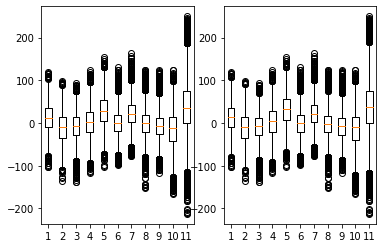

In [149]:
plt.subplot(121)
plt.boxplot(X_train)

plt.subplot(122)
plt.boxplot(X_train[np.where(y_train==0)[0],:])

plt.show()

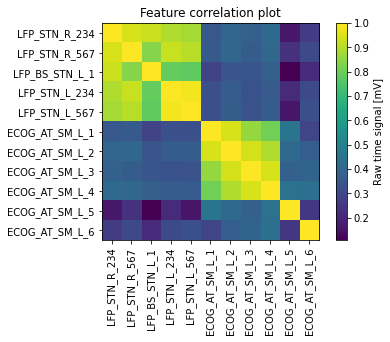

In [142]:
plt.imshow(np.corrcoef(X_train.T))
plt.yticks(np.arange(0, 11, 1),raw_arr.ch_names[:-1], rotation=0)
plt.xticks(np.arange(0, 11, 1),raw_arr.ch_names[:-1], rotation=90)
cbar = plt.colorbar()
cbar.set_label("Raw time signal [mV]")
plt.title("Feature correlation plot")
plt.show()

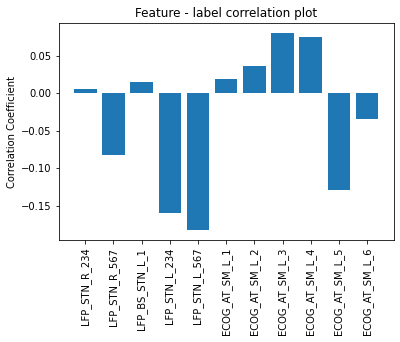

In [143]:
plt.bar(np.arange(0, 11, 1),
        [np.corrcoef(X_train[:,i], y_train)[0,1] for i in range(X_train.shape[1])])
plt.xticks(np.arange(0, 11, 1),raw_arr.ch_names[:-1], rotation=90)
plt.ylabel("Correlation Coefficient")
plt.title("Feature - label correlation plot")
plt.show()

👋Task 2
    
Pick channel 'ECOG_AT_SM_L_1', define a sklearn Support Vector Classifier, train it on the training set and report the resulting training and testing accuracies and F1 scores.

Why shouldn't we use accuracy here?

*Hint use np.expand_dims() for fitting the features for model.fit()*

In [87]:
model = sklearn.svm.SVC()
model.fit(np.expand_dims(X_train[:,5], axis=0).T, y_train)

SVC()

In [88]:
sklearn.metrics.accuracy_score(y_test, model.predict(np.expand_dims(X_test[:,5], axis=0).T))

0.9346889307837328

In [92]:
sklearn.metrics.f1_score(y_test, model.predict(np.expand_dims(X_test[:,5], axis=0).T))

0.0

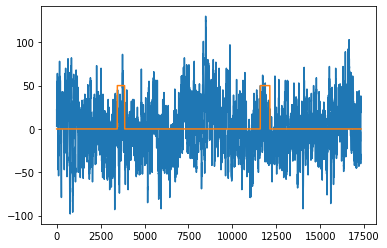

In [91]:
plt.plot(X_train[:,5])
plt.plot(y_train*50)

In [81]:
model = sklearn.svm.SVC()
model.fit(np.expand_dims(X_train[5,:], axis=0), y_train)
print(sklearn.metrics.accuracy_score(y_test, model.predict(np.expand_dims(X_test[5,:], axis=1))))


ValueError: Found input variables with inconsistent numbers of samples: [11, 17325]

In [ ]:
👋Task 3
    
**

#### We can actually do better by using precomputed oscillatory features!

In [65]:
👋Task 2
What did we do here? Raw data was used in order to predict the label directly.

SyntaxError: invalid character '👋' (U+1F44B) (<ipython-input-65-1ff591ead872>, line 1)

0.9769789983844911

0.7634854771784232

In [64]:
sklearn.metrics.roc_auc_score(y_test, model.predict(X_test))

0.8183724032780637

Optionally we will run the feature estimation for the example BIDS run

In [ ]:
# example_BIDS.run_example_BIDS()

Nothing to 👀 here..

Task 1
```    
model = sklearn.svm.SVC()
model.fit(X_train, y_train)
sklearn.metrics.accuracy_score(y_test, model.predict(X_test))
sklearn.metrics.f1_score(y_test, model.predict(X_test))
```

In [75]:
model = sklearn.svm.SVC()
model.fit(X_train, y_train)
print(sklearn.metrics.accuracy_score(y_test, model.predict(X_test)))
print(sklearn.metrics.f1_score(y_test, model.predict(X_test)))

0.9404793967142472
0.18450184501845018


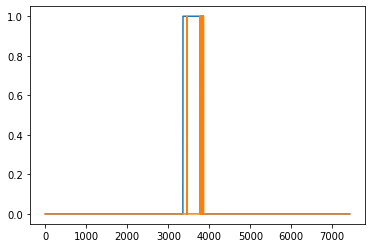

In [74]:
plt.plot(y_test)
plt.plot(model.predict(X_test))

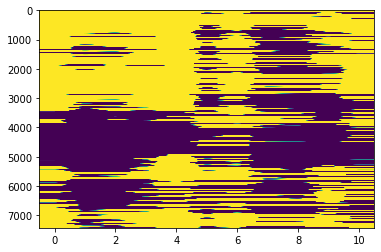

In [77]:
plt.imshow(X_test, aspect='auto')
plt.clim(-1,1)